In [1]:
# 1. numpy의 random 함수를 이용해 5x5의 행렬을 생성하고 A에 저장하시오.
import numpy as np
np.random.seed(123)
A = np.random.randn(5,5)
print(np.round(A,3))

[[-1.086  0.997  0.283 -1.506 -0.579]
 [ 1.651 -2.427 -0.429  1.266 -0.867]
 [-0.679 -0.095  1.491 -0.639 -0.444]
 [-0.434  2.206  2.187  1.004  0.386]
 [ 0.737  1.491 -0.936  1.176 -1.254]]


In [3]:
# 2. 생성된 A 행렬에 SVD를 적용해 U,Sigma, Vt를 도출하고 차원을 확인하시오.
from numpy.linalg import svd
U, Sigma, Vt = svd(A)
print(U.shape, Sigma.shape, Vt.shape)

(5, 5) (5,) (5, 5)


In [5]:
# 3. 생성된 A 행렬에 Truncated SVD를 적용해 U_tr, Sigma_tr, Vt_tr를 도출하고 차원을 확인하시오.
from scipy.sparse.linalg import svds
num_components=3
U_tr, Sigma_tr, Vt_tr = svds(A, k=num_components)
print(U_tr.shape, Sigma_tr.shape, Vt_tr.shape)

(5, 3) (3,) (3, 5)


In [6]:
# 4. SVD로 분해된 행렬과 Truncated SVD로 분해된 행렬들을 원본 행렬로 복원한 후 차이를 확인하시오
# SIgma는 다시 대칭행렬로 변환 필요 !
Sigma_mat = np.diag(Sigma)
A_ = np.dot(np.dot(U,Sigma_mat),Vt)
Sigma_tr_mat = np.diag(Sigma_tr)
A_tr = np.dot(np.dot(U_tr,Sigma_tr_mat),Vt_tr)
print('원본 행렬:\n',np.round(A,3))
print('SVD 복원 행렬:\n',np.round(A_,3))
print('Truncated SVD 복원 행렬:\n',np.round(A_tr,3))

원본 행렬:
 [[-1.086  0.997  0.283 -1.506 -0.579]
 [ 1.651 -2.427 -0.429  1.266 -0.867]
 [-0.679 -0.095  1.491 -0.639 -0.444]
 [-0.434  2.206  2.187  1.004  0.386]
 [ 0.737  1.491 -0.936  1.176 -1.254]]
SVD 복원 행렬:
 [[-1.086  0.997  0.283 -1.506 -0.579]
 [ 1.651 -2.427 -0.429  1.266 -0.867]
 [-0.679 -0.095  1.491 -0.639 -0.444]
 [-0.434  2.206  2.187  1.004  0.386]
 [ 0.737  1.491 -0.936  1.176 -1.254]]
Truncated SVD 복원 행렬:
 [[-1.123  1.053  0.038 -1.339  0.176]
 [ 1.628 -2.38  -0.625  1.397 -0.257]
 [-0.64  -0.008  1.216 -0.49   0.472]
 [-0.453  2.195  2.205  1.002  0.31 ]
 [ 0.754  1.541 -1.1    1.268 -0.714]]


[0.98766188 0.01206028]


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


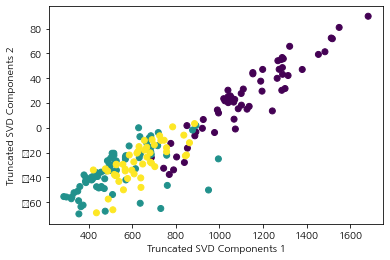

In [17]:
#5. wine 데이터를 활용해 Truncated SVD를 실습해본 후 두 컴포넌트가 전체 분산의 어느정도 비율을 설멍해주는 지 출력하시오.
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import TruncatedSVD
wine = load_wine()
wine_ftrs = wine.data
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(wine_ftrs)
wine_tsvd= tsvd.transform(wine_ftrs)

plt.scatter(x=wine_tsvd[:,0], y=wine_tsvd[:,1], c=wine.target)
plt.xlabel('Truncated SVD Components 1')
plt.ylabel('Truncated SVD Components 2')

print(tsvd.explained_variance_ratio_)
# 첫 번째 컴포넌트만으로도 98%가 설명됨.